In [1]:
import numpy as np
from matplotlib import pyplot as plt
from perceptron_v2 import perceptron

In [2]:
np.random.seed(6)

In [3]:
def train_test_split(data, training_ratio=0.7):
    train_sample_size = np.int_(data.shape[0]*training_ratio)
    np.random.shuffle(data)
    #return training_samples, test_samples
    return data[:train_sample_size, :], data[train_sample_size:, :]

# Non-linearly seperable data for classification

In [224]:
file = '/Users/raunavghosh/Documents/DeepLearning/Assignments/ProgrammingAssignment1/Group10/Classification/NLS_Group10.txt'

In [225]:
data = np.loadtxt(file, dtype=float, skiprows=1)

In [226]:
data.shape

(1500, 2)

In [227]:
class1_data = data[:500, :]
class2_data = data[500:1000, :]
class3_data = data[1000:, :]

In [228]:
class1_data.shape, class2_data.shape, class3_data.shape

((500, 2), (500, 2), (500, 2))

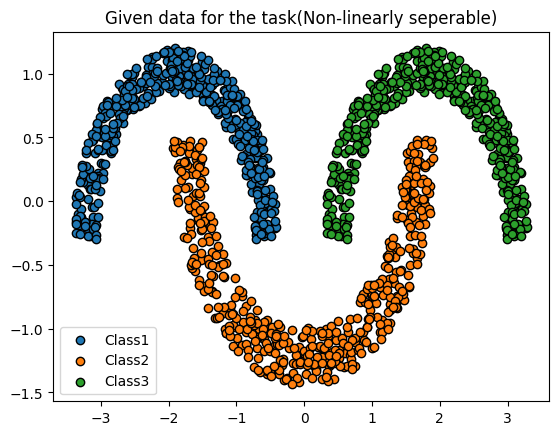

In [229]:
plt.scatter(class1_data[:, 0], class1_data[:, 1], edgecolors='black')
plt.scatter(class2_data[:, 0], class2_data[:, 1], edgecolors='black')
plt.scatter(class3_data[:, 0], class3_data[:, 1], edgecolors='black')
plt.legend(['Class1', 'Class2', 'Class3'])
plt.title('Given data for the task(Non-linearly seperable)')
plt.show()

In [230]:
class1_train, class1_test = train_test_split(class1_data)
class2_train, class2_test = train_test_split(class2_data)
class3_train, class3_test = train_test_split(class3_data)

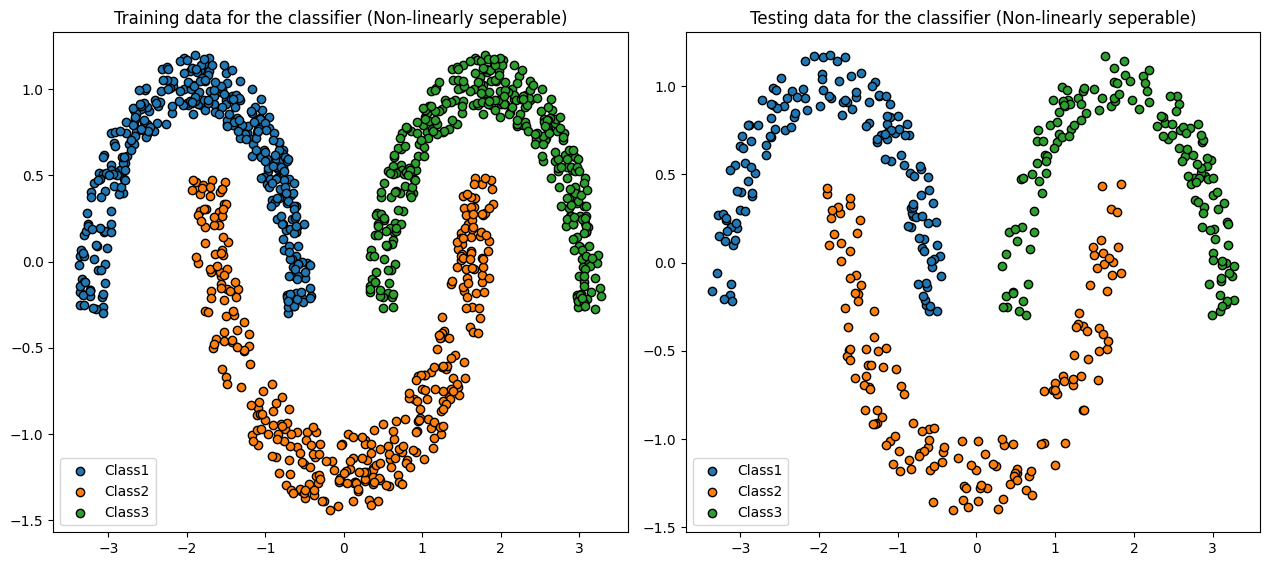

In [231]:
plt.subplot(1,2,1)
plt.scatter(class1_train[:, 0], class1_train[:, 1], edgecolors='black')
plt.scatter(class2_train[:, 0], class2_train[:, 1], edgecolors='black')
plt.scatter(class3_train[:, 0], class3_train[:, 1], edgecolors='black')
plt.legend(['Class1', 'Class2', 'Class3'])
plt.title('Training data for the classifier (Non-linearly seperable)')

plt.subplot(1,2,2)
plt.scatter(class1_test[:, 0], class1_test[:, 1], edgecolors='black')
plt.scatter(class2_test[:, 0], class2_test[:, 1], edgecolors='black')
plt.scatter(class3_test[:, 0], class3_test[:, 1], edgecolors='black')
plt.legend(['Class1', 'Class2', 'Class3'])
plt.title('Testing data for the classifier (Non-linearly seperable)')
plt.tight_layout(rect=[0, 0, 2, 1.2])
plt.show()

In [232]:
class classifer:
    def __init__(self, class1_train, class2_train, class3_train):
        neta=0.002
        max_epoch = 100
        activation_type = 'sigmoid_tanh'
        self.class1v2 = perceptron(labels=(1, 2), n_features=2, activation=activation_type, learning_rate=neta, max_epoch=max_epoch)
        self.class2v3 = perceptron(labels=(2, 3), n_features=2, activation=activation_type, learning_rate=neta, max_epoch=max_epoch)
        self.class3v1 = perceptron(labels=(3, 1), n_features=2, activation=activation_type, learning_rate=neta, max_epoch=max_epoch)
        self.epoch_err_1 = self.class1v2.fit_classification(class1_train, class2_train)
        self.epoch_err_2 = self.class2v3.fit_classification(class2_train, class3_train)
        self.epoch_err_3 = self.class3v1.fit_classification(class3_train, class1_train)
        return None
    
    def predict(self, sample):
        preds = self.class1v2.predict_class(sample), self.class2v3.predict_class(sample), self.class3v1.predict_class(sample)
        return max(preds, key=preds.count) # class with highest prediction is returned
    
    def predict1v2(self, sample):
        return self.class1v2.predict_class(sample)
    
    def predict2v3(self, sample):
        return self.class2v3.predict_class(sample)
    
    def predict3v1(self, sample):
        return self.class3v1.predict_class(sample)



In [233]:
np.random.seed(6)

In [234]:
nl_classifier = classifer(class1_train, class2_train, class3_train)
# import pickle
# with open("nl_classifier.pkl", mode="wb") as f:
#     pickle.dump(nl_classifier, f, pickle.HIGHEST_PROTOCOL)

# with open("nl_classifier.pkl", mode='rb') as f:
#     nl_classifier = pickle.load(f)

In [235]:
len(nl_classifier.epoch_err_1), len(nl_classifier.epoch_err_2), len(nl_classifier.epoch_err_3)


(100, 100, 100)

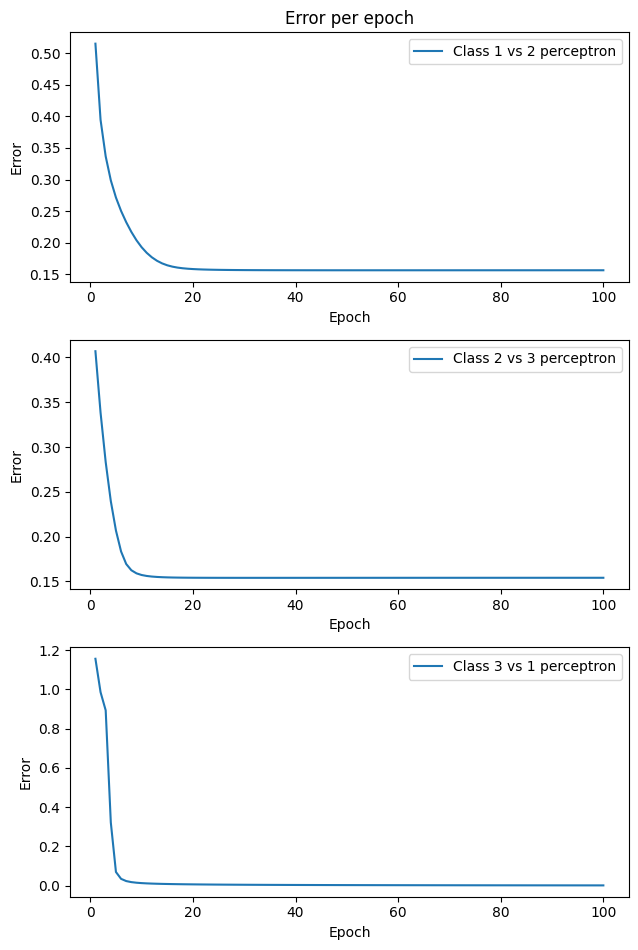

In [236]:
plt.figure()
plt.subplot(3,1,1)
plt.title("Error per epoch")
plt.plot(range(1, len(nl_classifier.epoch_err_1)+1), nl_classifier.epoch_err_1, label="Class 1 vs 2 perceptron")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.subplot(3,1,2)
plt.plot(range(1, len(nl_classifier.epoch_err_2)+1), nl_classifier.epoch_err_2, label="Class 2 vs 3 perceptron")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.subplot(3,1,3)
plt.plot(range(1, len(nl_classifier.epoch_err_3)+1), nl_classifier.epoch_err_3, label="Class 3 vs 1 perceptron")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.tight_layout(rect=[0, 0, 1, 2])
plt.show()

In [237]:
# generating points in the region
x_arr = np.linspace(-4, 4, 1000)
y_arr = np.linspace(-1.5, 1.5, 1000)
xx, yy = np.meshgrid(x_arr, y_arr)
region = np.concatenate((xx.reshape((-1,1)), yy.reshape((-1,1))), axis=1)

In [238]:
pred_region1v2 = []
for point in region:
    pred_region1v2.append(nl_classifier.predict1v2(point))
pred_region1v2 = np.reshape(pred_region1v2, xx.shape)

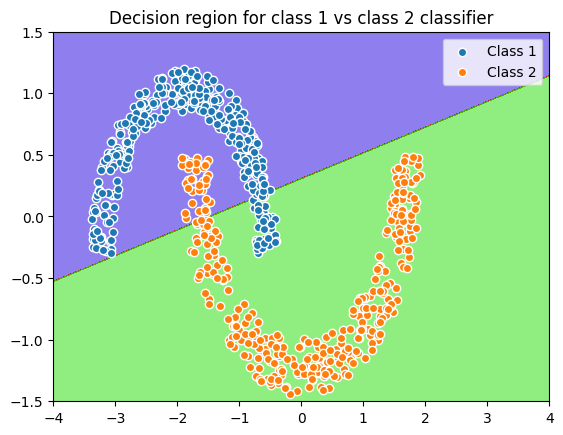

In [239]:
plt.figure()
plt.contourf(xx, yy, pred_region1v2, alpha = 0.5, cmap='brg')

plt.scatter(class1_train[:, 0], class1_train[:, 1], label='Class 1', edgecolors='white')
plt.scatter(class2_train[:, 0], class2_train[:, 1], label='Class 2', edgecolors='white')
plt.legend()
plt.title('Decision region for class 1 vs class 2 classifier')

plt.show()

In [240]:
pred_region2v3 = []
for point in region:
    pred_region2v3.append(nl_classifier.predict2v3(point))


In [241]:
pred_region2v3 = np.reshape(pred_region2v3, xx.shape)

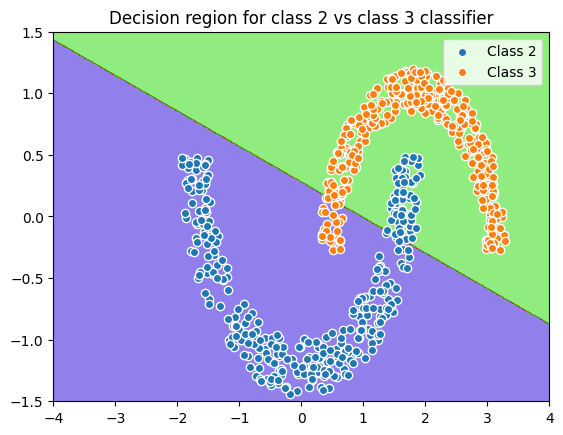

In [242]:
plt.figure()
plt.contourf(xx, yy, pred_region2v3, alpha = 0.5, cmap='brg')

plt.scatter(class2_train[:, 0], class2_train[:, 1], label='Class 2', edgecolors='white')
plt.scatter(class3_train[:, 0], class3_train[:, 1], label='Class 3', edgecolors='white')
plt.legend()
plt.title('Decision region for class 2 vs class 3 classifier')

plt.show()

In [243]:
pred_region3v1 = []
for point in region:
    pred_region3v1.append(nl_classifier.predict3v1(point))
pred_region3v1 = np.reshape(pred_region3v1, xx.shape)

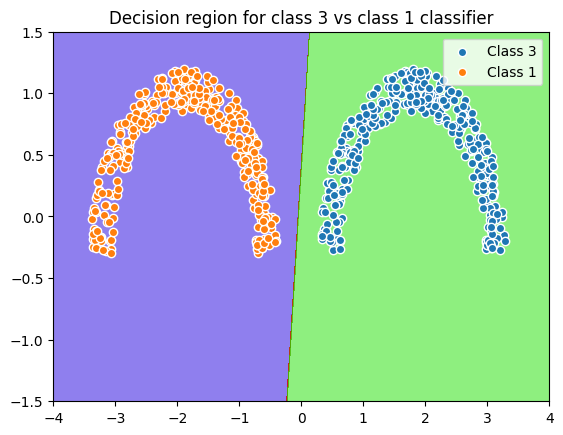

In [244]:
plt.figure()
plt.contourf(xx, yy, pred_region3v1, alpha = 0.5, cmap='brg')

plt.scatter(class3_train[:, 0], class3_train[:, 1], label='Class 3', edgecolors='white')
plt.scatter(class1_train[:, 0], class1_train[:, 1], label='Class 1', edgecolors='white')
plt.legend()
plt.title('Decision region for class 3 vs class 1 classifier')

plt.show()

In [245]:
pred_region = []
for point in region:
    pred_region.append(nl_classifier.predict(point))
region.shape, len(pred_region)
pred_region = np.reshape(pred_region, xx.shape)

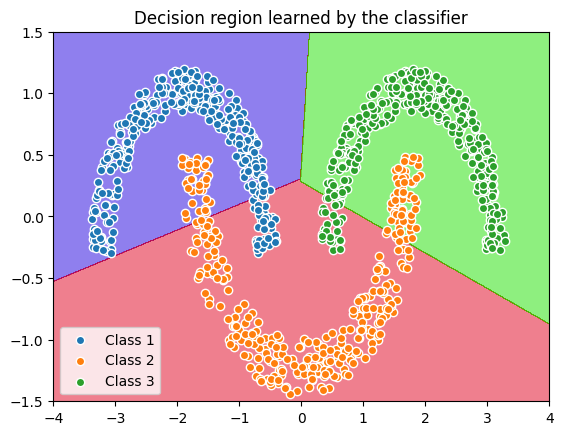

In [246]:
plt.figure()
plt.contourf(xx, yy, pred_region, alpha = 0.5, cmap='brg')

plt.scatter(class1_train[:, 0], class1_train[:, 1], label='Class 1', edgecolors='white')
plt.scatter(class2_train[:, 0], class2_train[:, 1], label='Class 2', edgecolors='white')
plt.scatter(class3_train[:, 0], class3_train[:, 1], label='Class 3', edgecolors='white')
plt.legend()
plt.title('Decision region learned by the classifier')

plt.show()

## Testing phase

In [247]:
all_test = np.concatenate((class1_test, class2_test, class3_test), axis=0)
all_true_labels = np.concatenate((np.full(shape=class1_test.shape[0], fill_value=1),
                                np.full(shape=class2_test.shape[0], fill_value=2),
                                np.full(shape=class3_test.shape[0], fill_value=3),), axis=0)    
all_test.shape, all_true_labels.shape

((450, 2), (450,))

In [248]:
all_pred_labels = []
for sample in all_test:
    all_pred_labels.append(nl_classifier.predict(sample=sample))

In [249]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score
print(f'Confusion matrix:\n{confusion_matrix(all_true_labels, all_pred_labels)}')
print(f'Acccuracy: {accuracy_score(all_true_labels, all_pred_labels)}')
print(f'Recall: {recall_score(all_true_labels, all_pred_labels, labels=(1, 2, 3), average="micro")}')
print(f'f1-score: {f1_score(all_true_labels, all_pred_labels, labels=(1, 2, 3), average="micro")}')

Confusion matrix:
[[131  19   0]
 [ 15 118  17]
 [  0  13 137]]
Acccuracy: 0.8577777777777778
Recall: 0.8577777777777778
f1-score: 0.8577777777777779
